# IRC Behavioral Analysis - Visualization

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

## Loading Data

In [29]:
import os

project_dir = '/Users/preneond/Documents/Work/Stratosphere/IRC-Research/IRC-Behavioral-Analysis/' 
log_names_mal = ['03','04','34','39','42','51','56','62']
log_names = ['03','04','34','39','42','51','56','62', 'irc1']
out_dir = os.path.join(project_dir, 'python/out/')

logs_fn_join_mal = [os.path.join(out_dir,l, 'join_freq.log') for l in log_names]
logs_fn_join = [os.path.join(out_dir,l, 'join_freq.log') for l in log_names_all]
logs_fn_privmsg_mal = [os.path.join(out_dir,l, 'lev_dist.log') for l in log_names_mal]

In [30]:
import json

def irc_loadfile(file_in):
    data = []
    with open(file_in, 'r') as f:
        data = json.load(f)
    return data 

In [31]:
logs_join_mal = list(map(lambda x: irc_loadfile(x),logs_fn_join_mal))
logs_join = list(map(lambda x: irc_loadfile(x),logs_fn_join))
# logs_join = list(filter(lambda x: len(x) != 0 ,logs_join))

logs_privmsg = list(map(lambda x: irc_loadfile(x),logs_fn_privmsg))
# logs_privmsg = list(filter(lambda x: len(x) != 0 ,logs_privmsg))

## Number of Users in Channel per Day

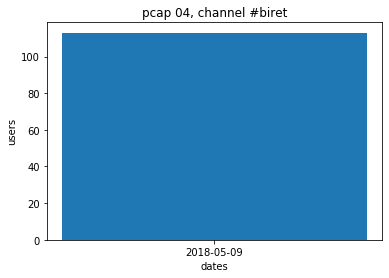

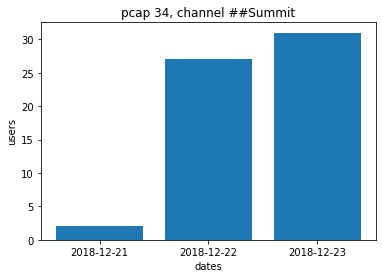

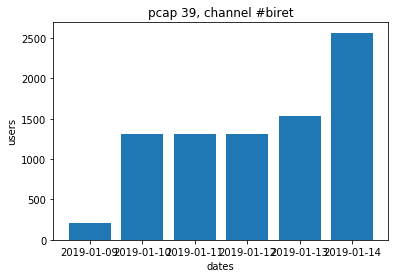

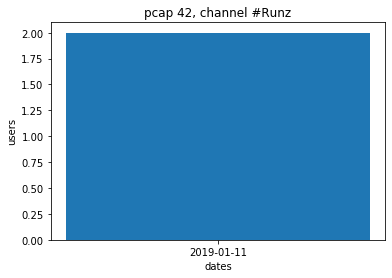

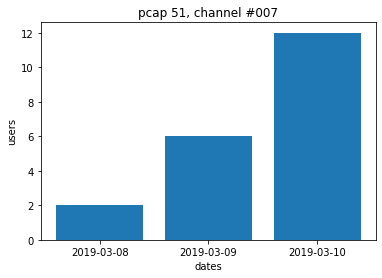

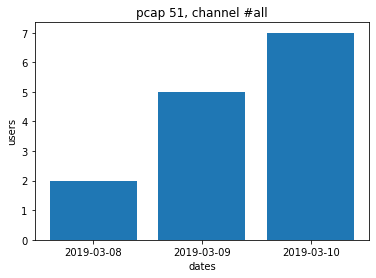

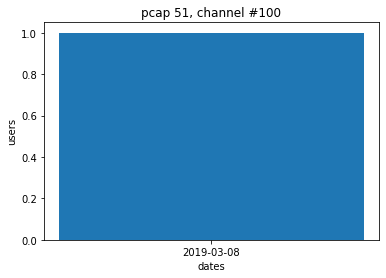

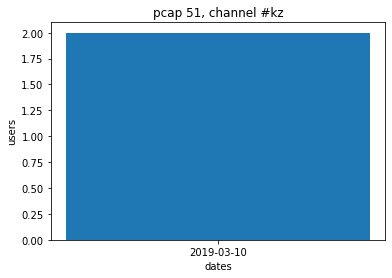

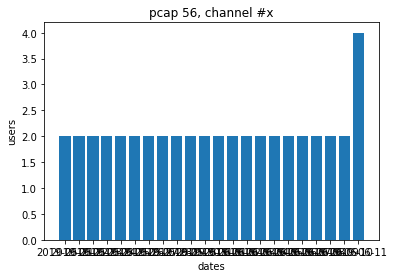

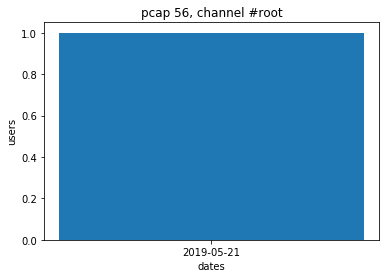

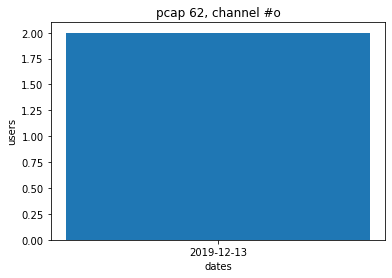

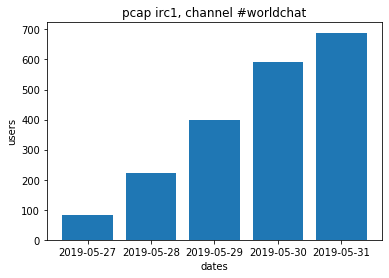

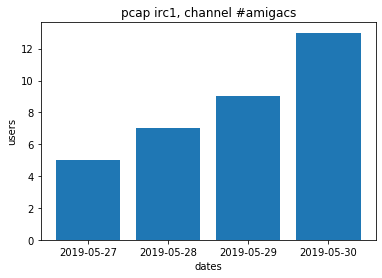

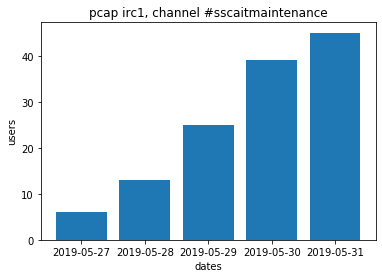

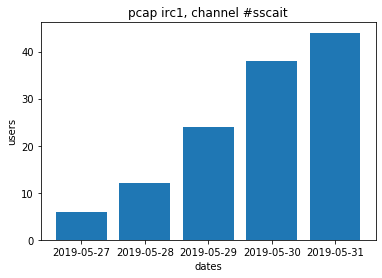

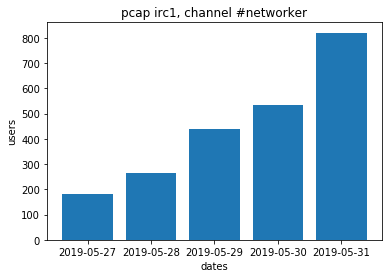

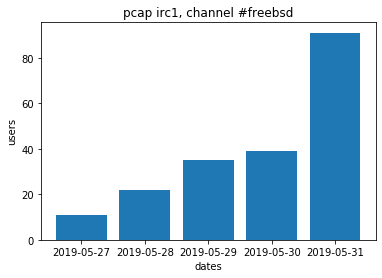

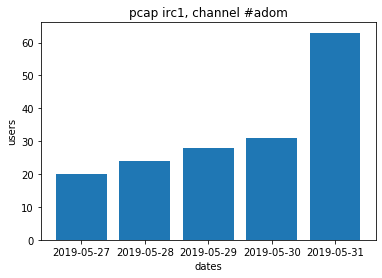

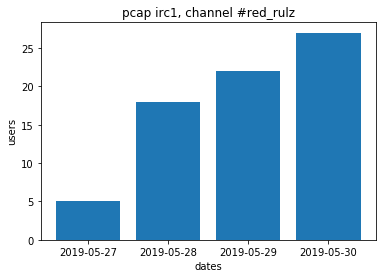

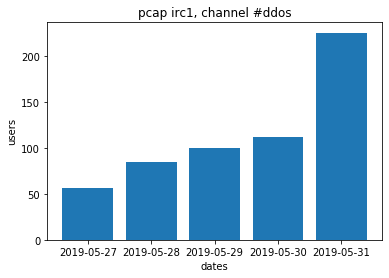

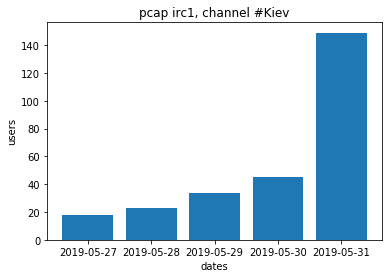

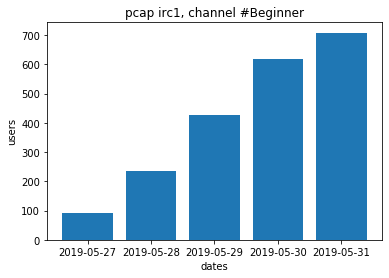

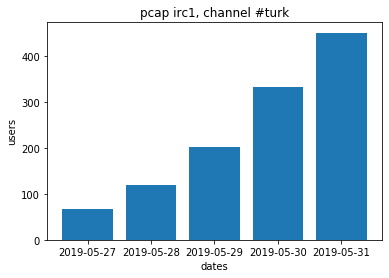

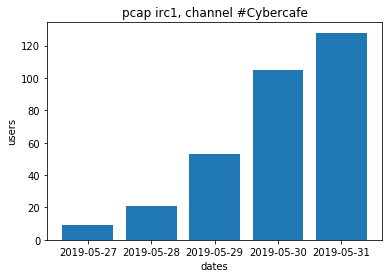

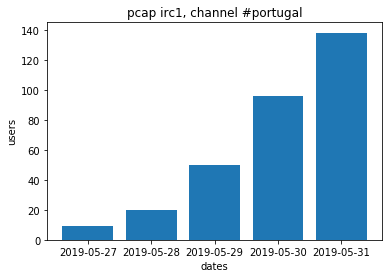

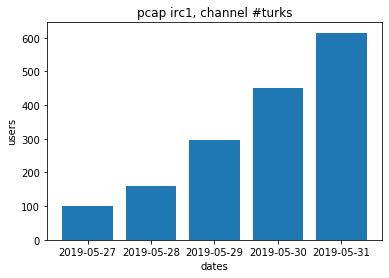

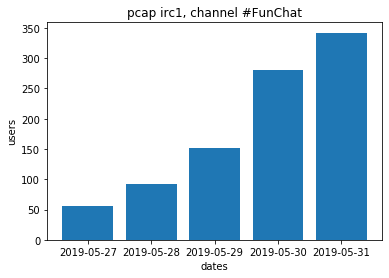

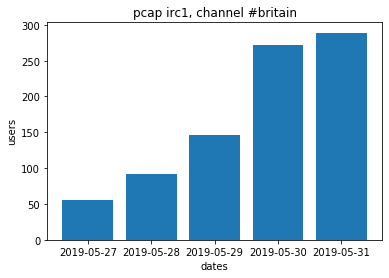

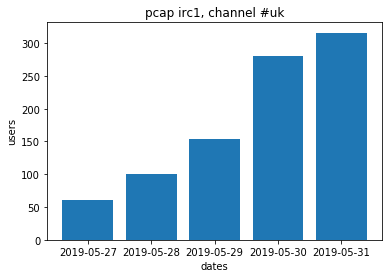

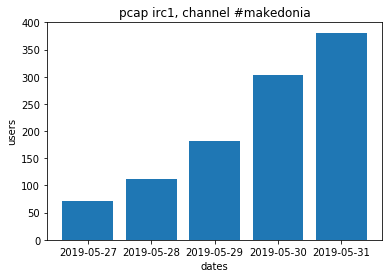

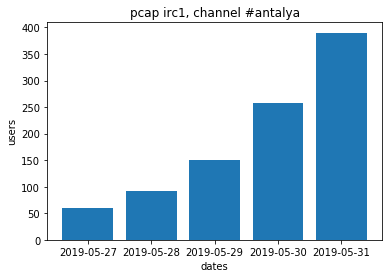

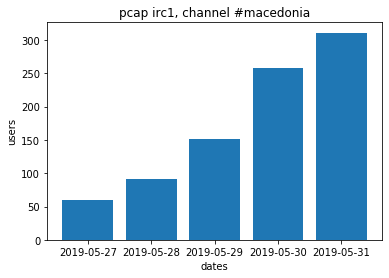

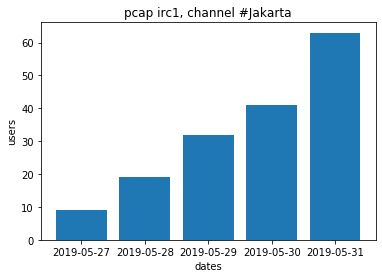

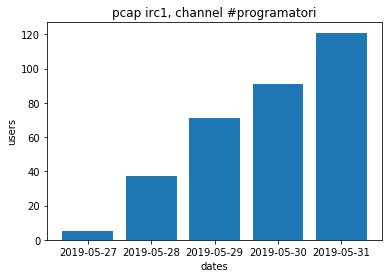

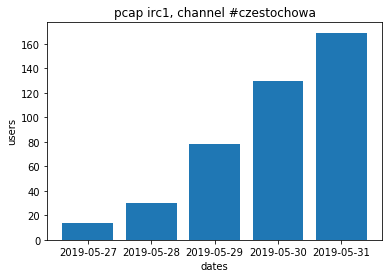

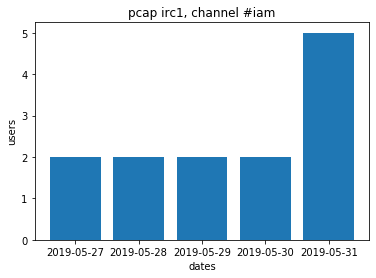

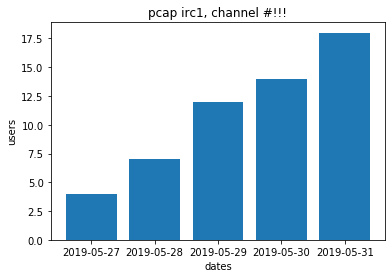

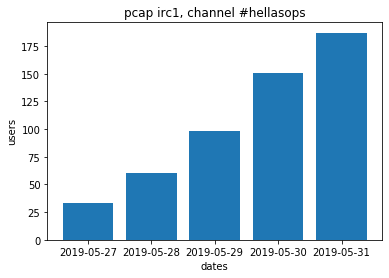

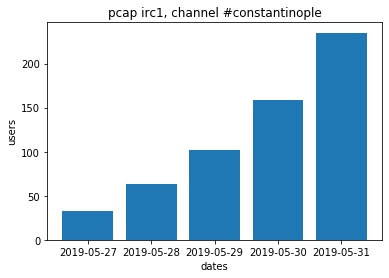

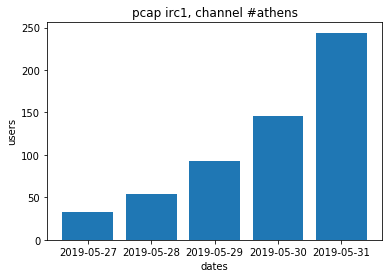

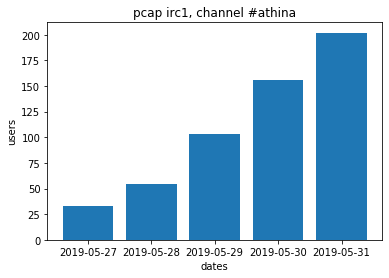

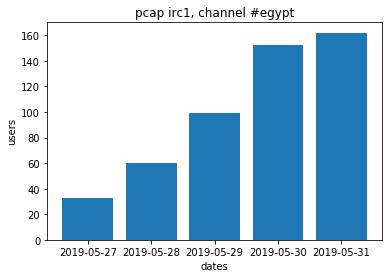

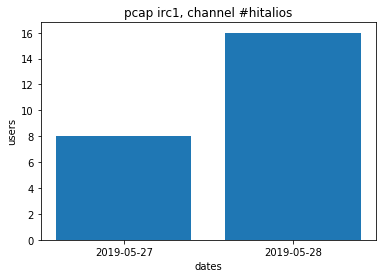

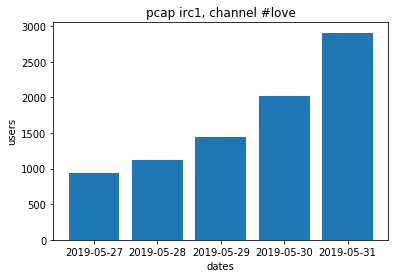

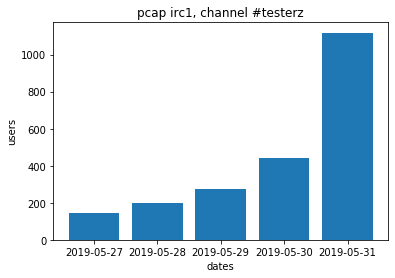

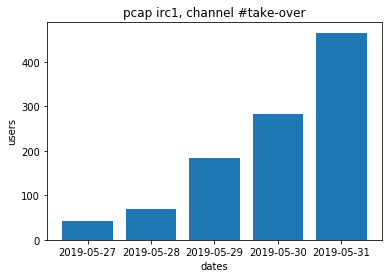

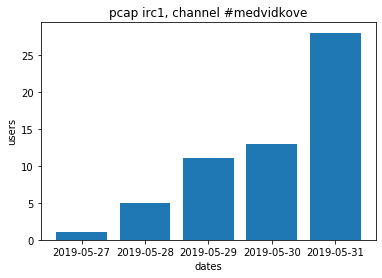

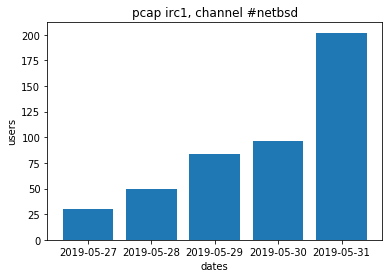

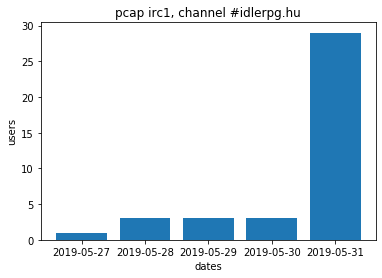

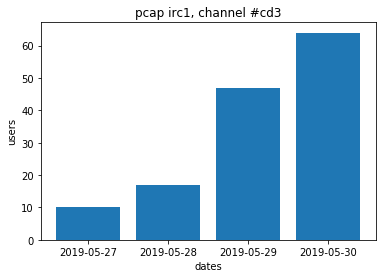

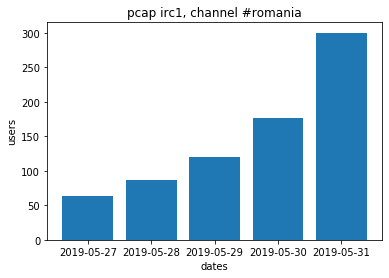

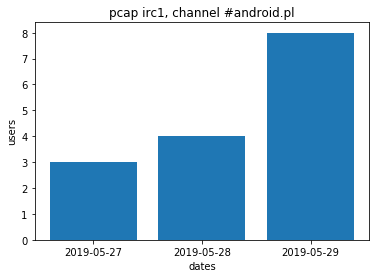

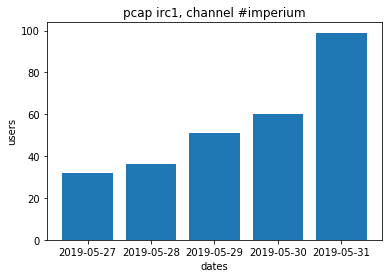

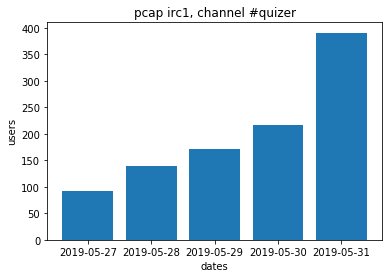

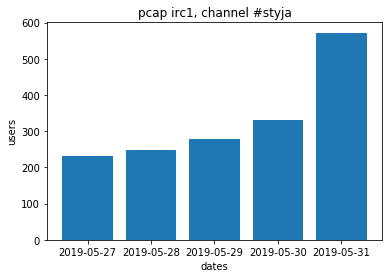

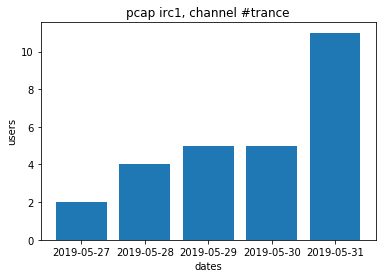

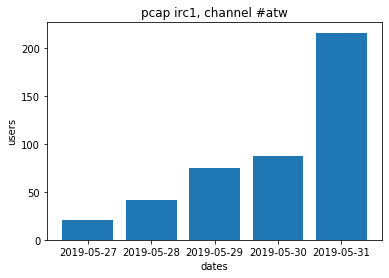

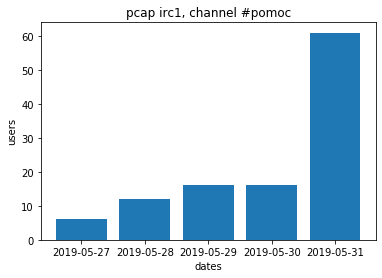

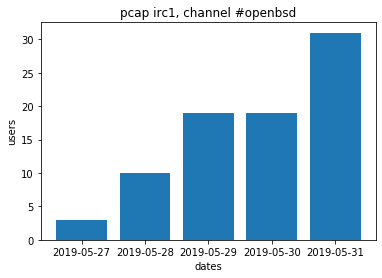

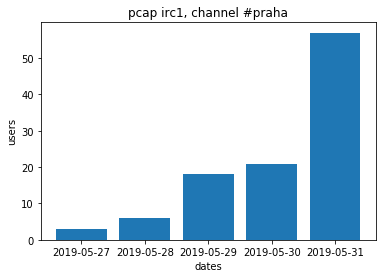

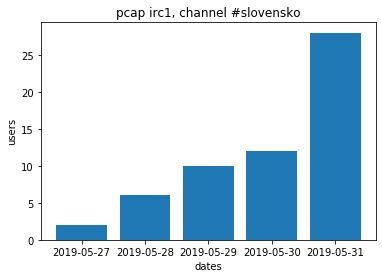

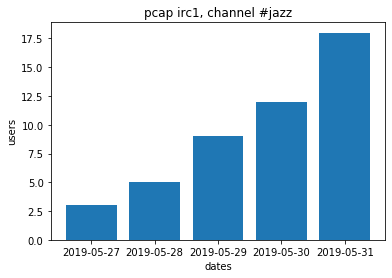

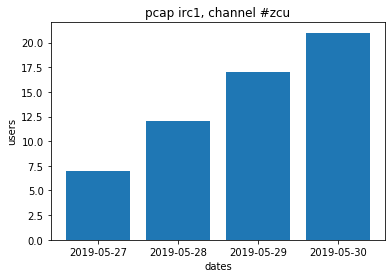

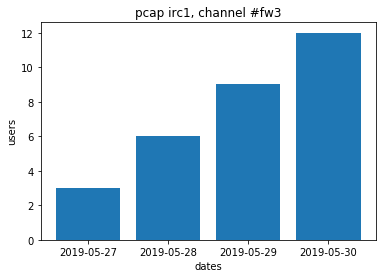

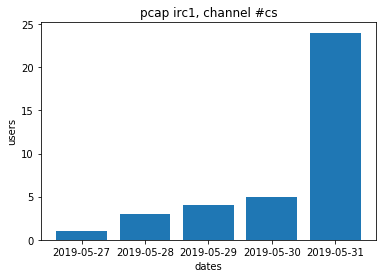

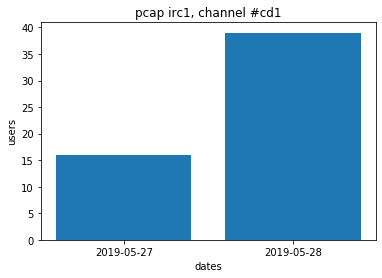

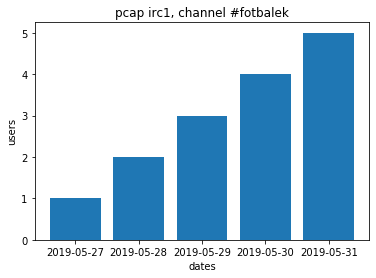

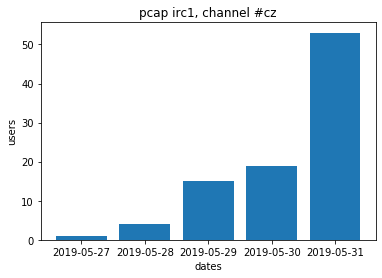

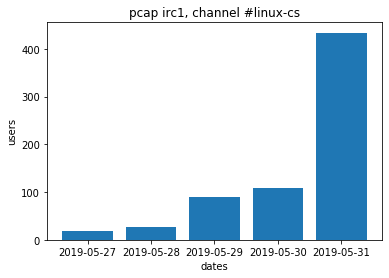

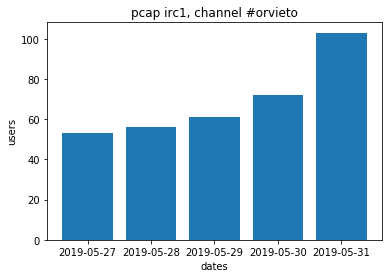

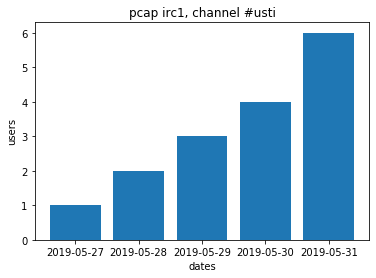

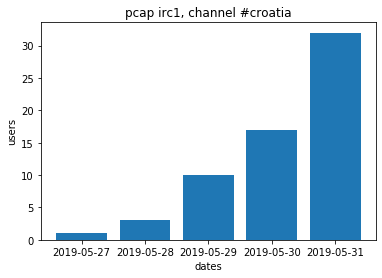

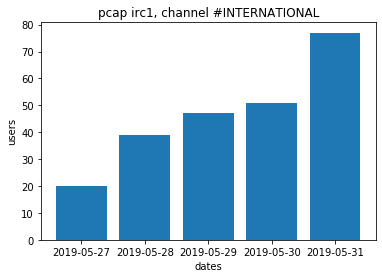

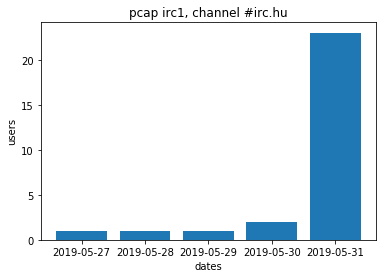

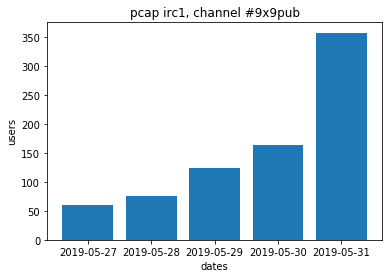

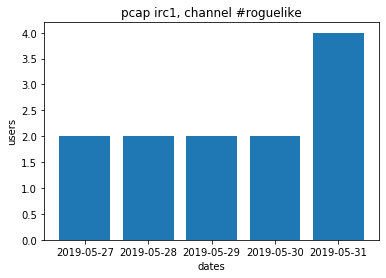

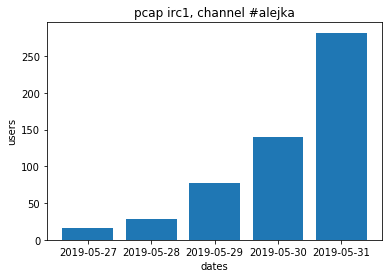

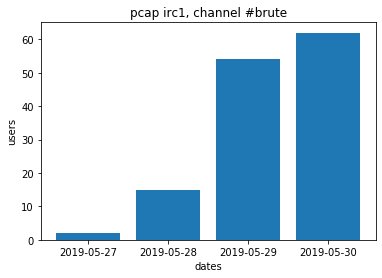

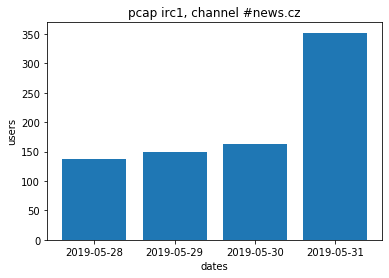

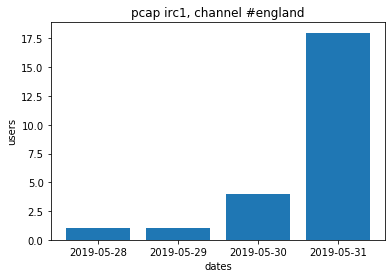

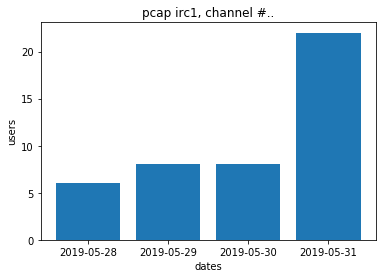

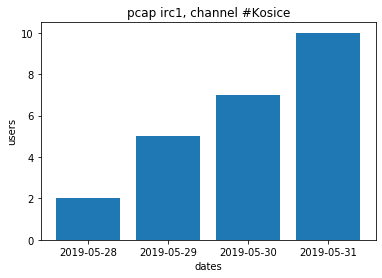

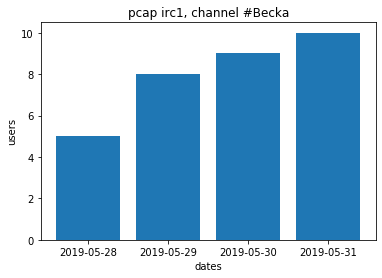

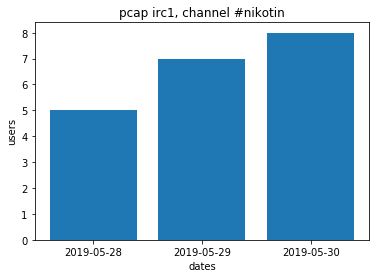

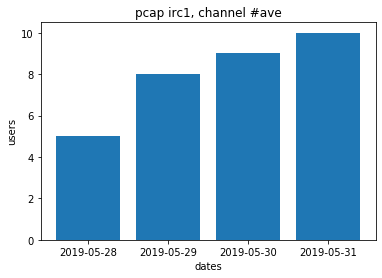

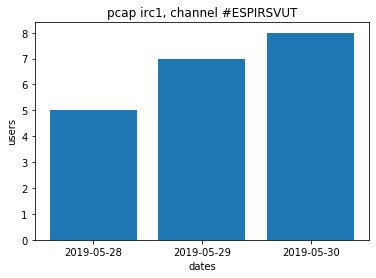

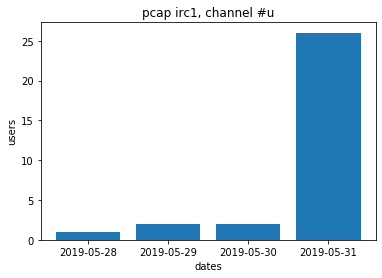

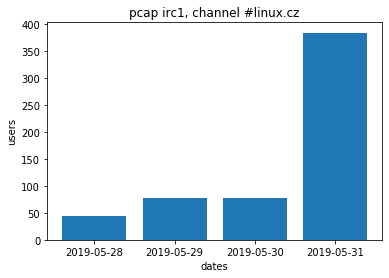

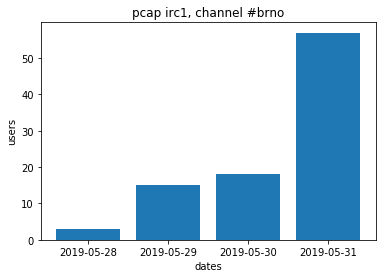

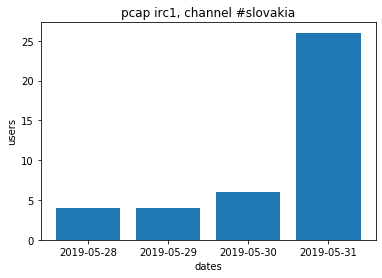

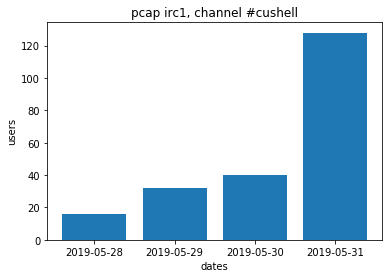

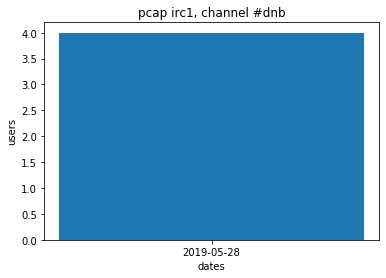

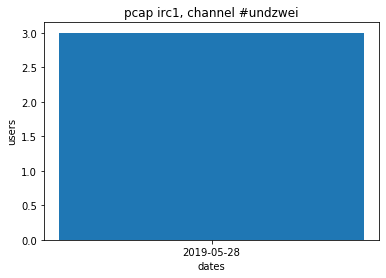

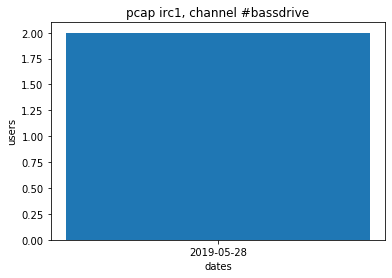

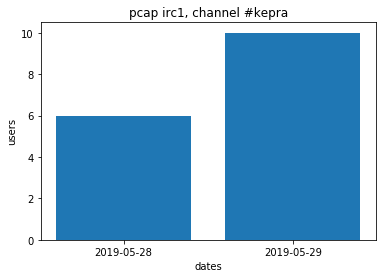

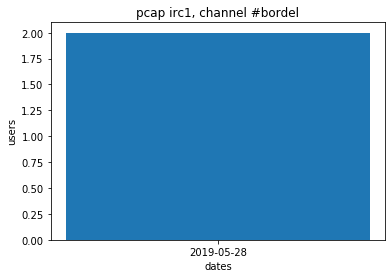

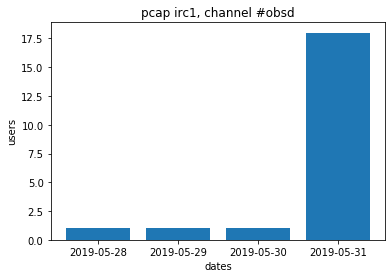

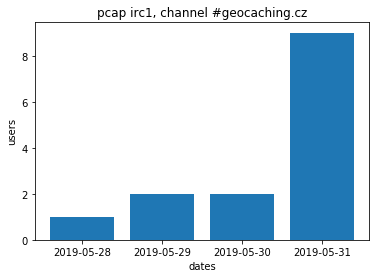

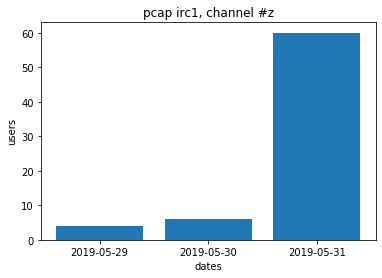

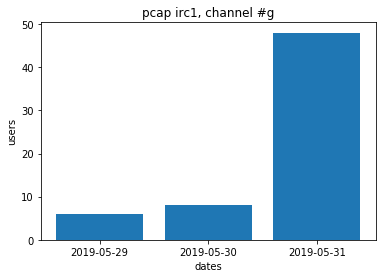

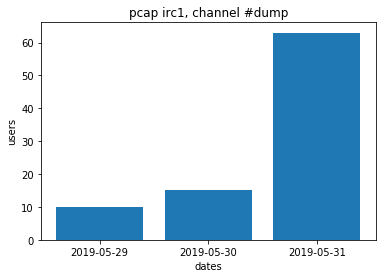

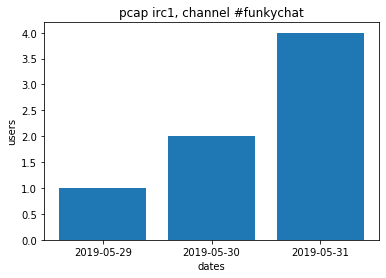

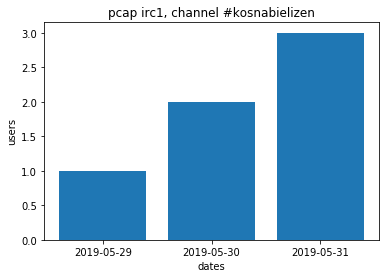

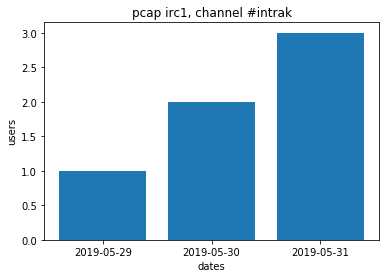

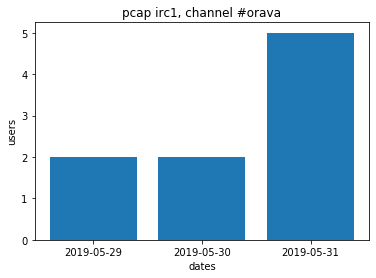

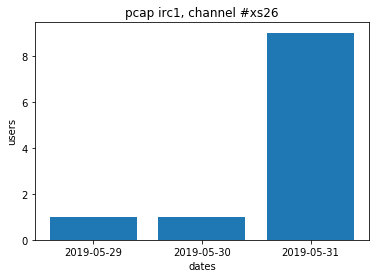

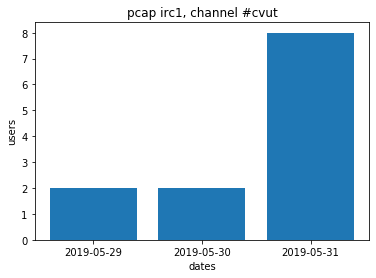

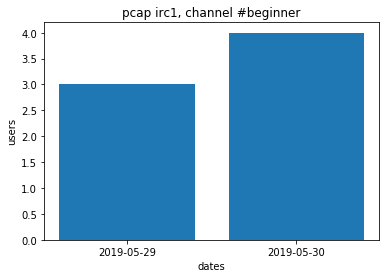

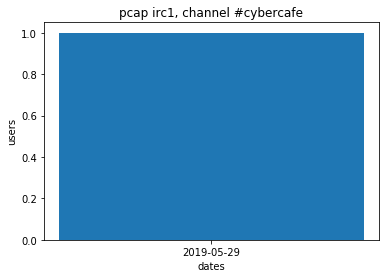

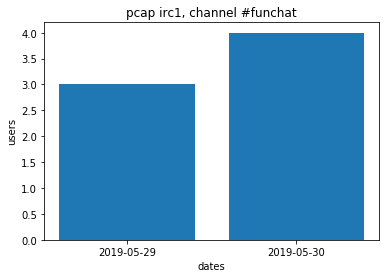

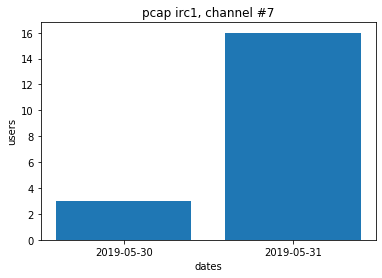

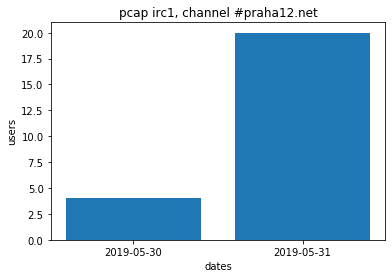

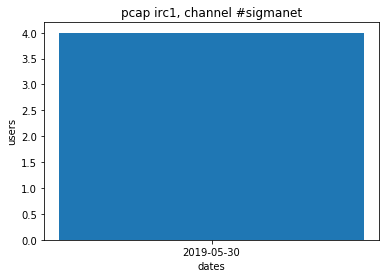

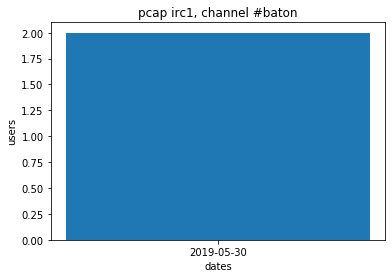

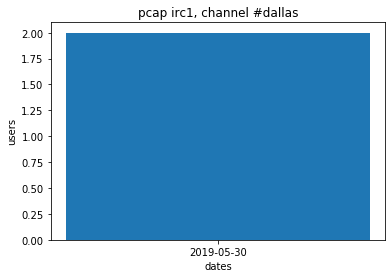

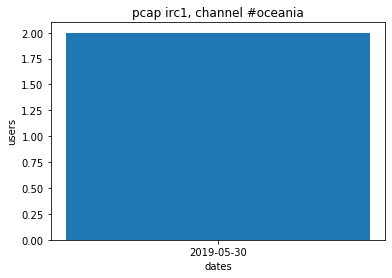

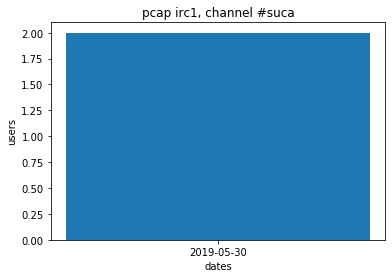

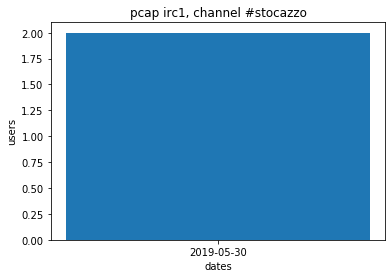

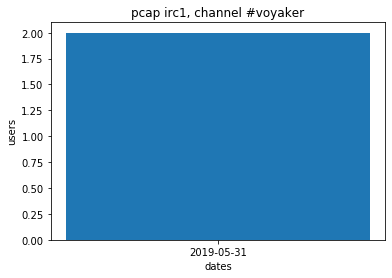

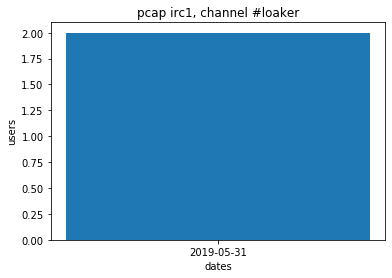

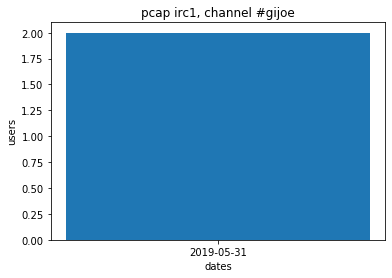

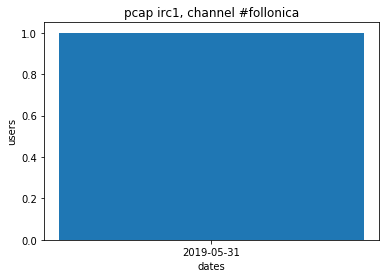

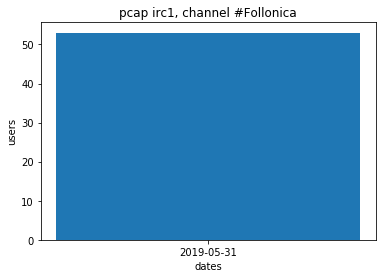

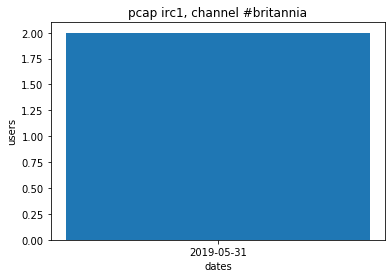

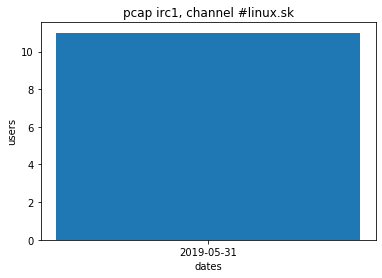

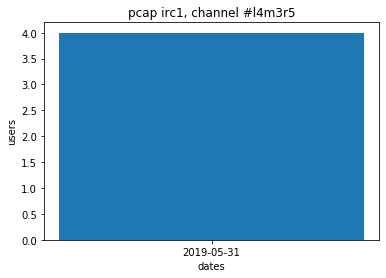

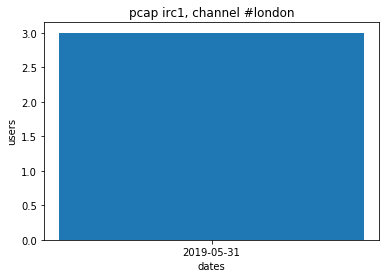

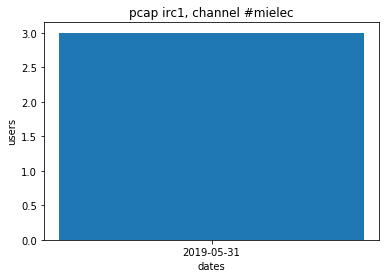

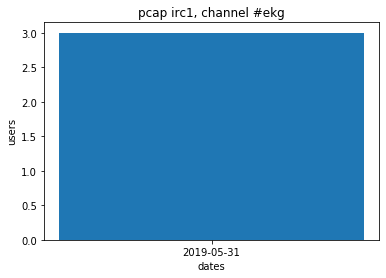

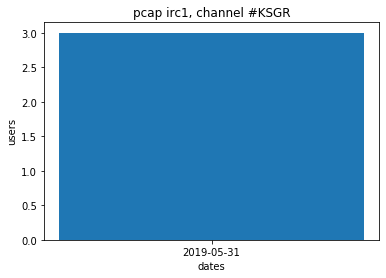

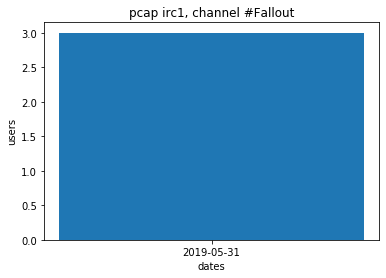

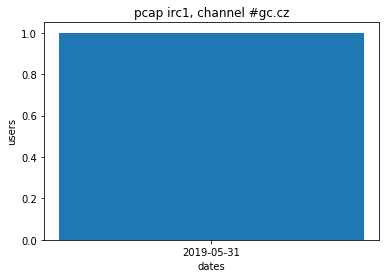

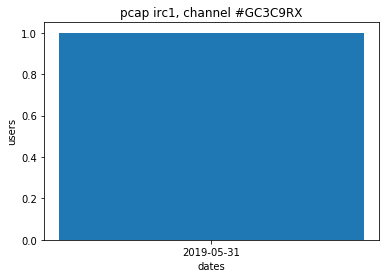

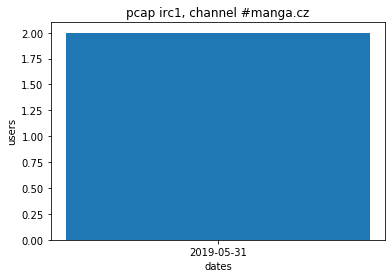

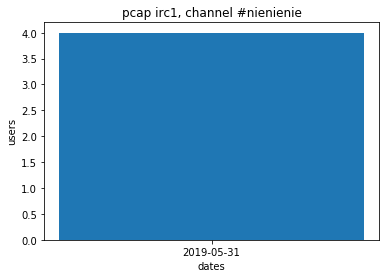

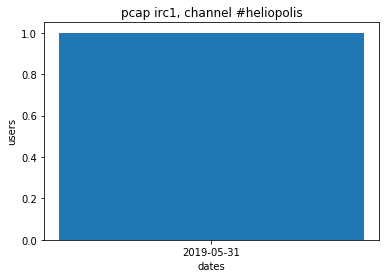

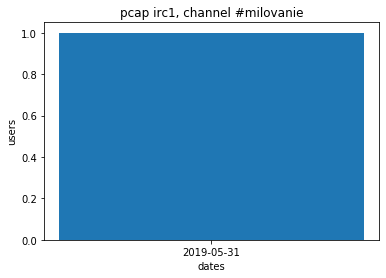

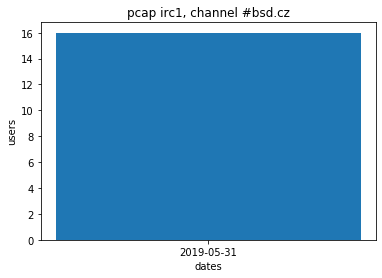

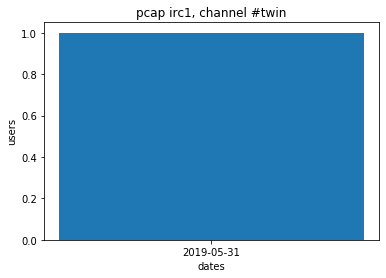

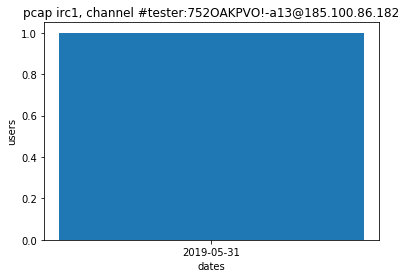

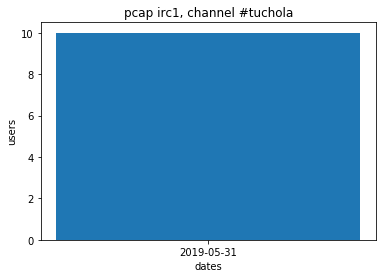

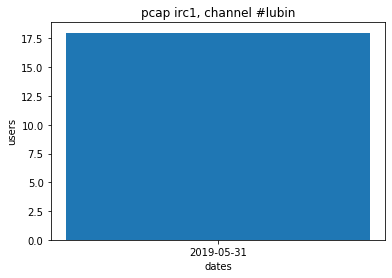

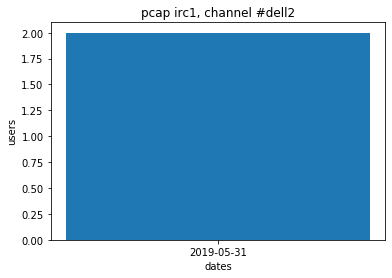

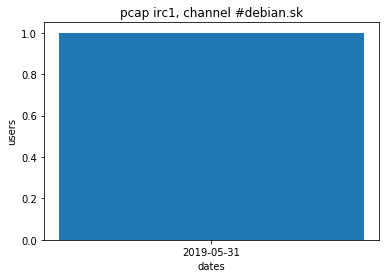

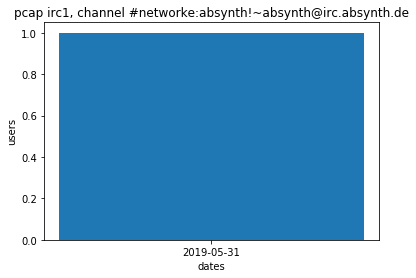

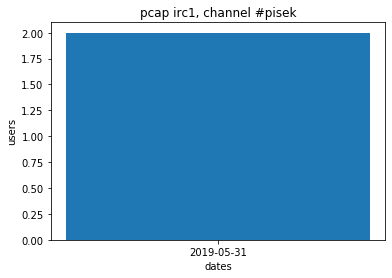

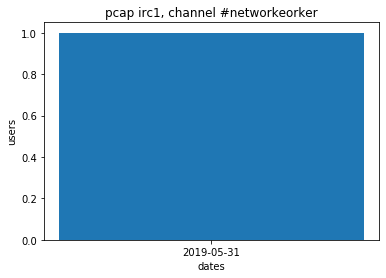

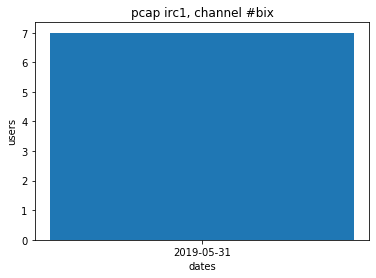

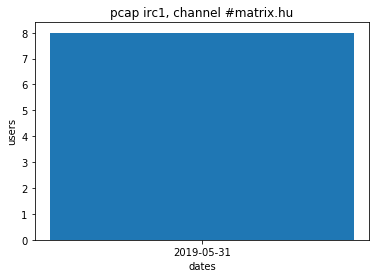

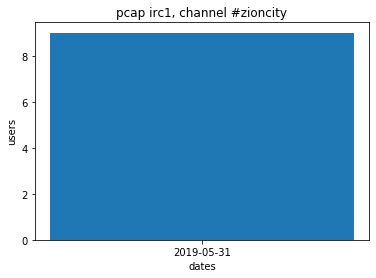

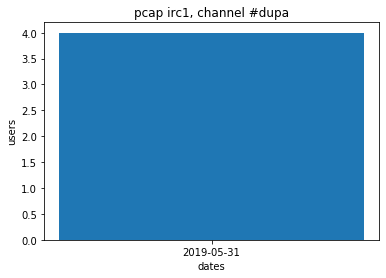

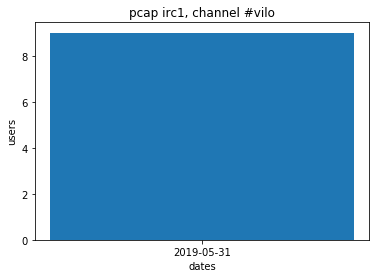

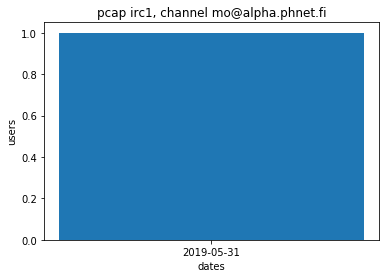

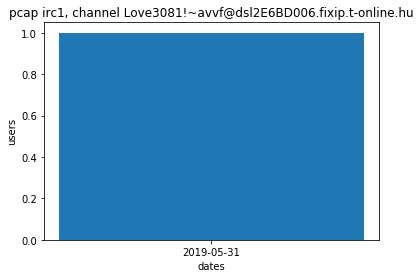

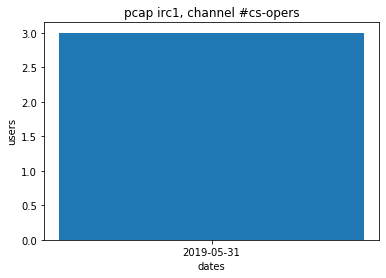

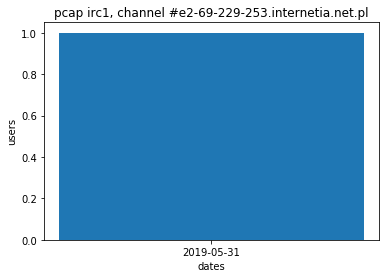

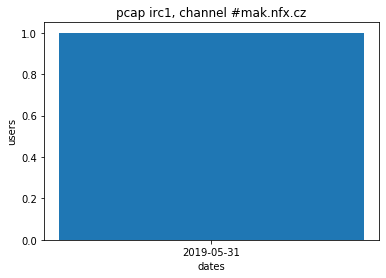

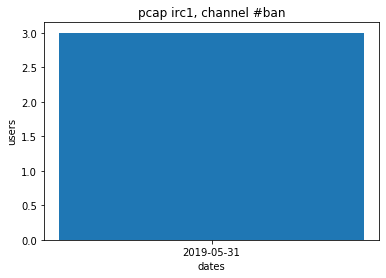

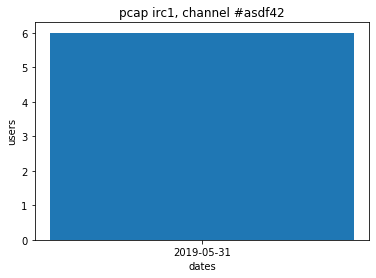

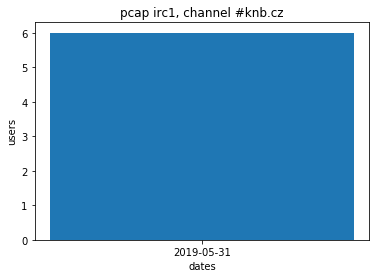

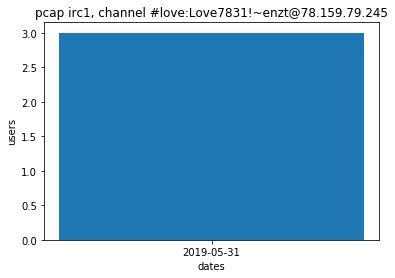

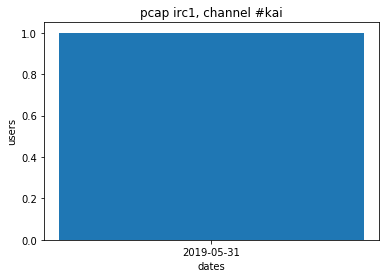

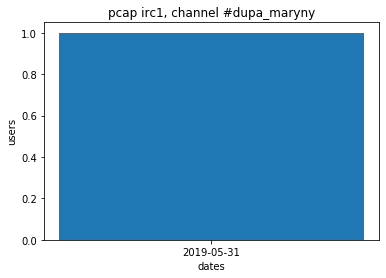

In [32]:
def ircjoin_visualize(dates, dates_count, log_name="", channel=""):
    plt.bar(dates,dates_count)
    plt.title('pcap {}, channel {}'.format(log_name,channel))
    plt.xlabel('dates')
    plt.ylabel('users')
    plt.show()

for log_name,l in zip(log_names,logs_join):
    for ll in l:
        channel, logs = ll
        dates = list(map(lambda x: x[0], logs))
        dates_counts = list(map(lambda x: x[1], logs))
        ircjoin_visualize(dates, dates_counts, log_name, channel)

## Levenshtein Distance of Messages in Channel

### Bubble plot

In [57]:
def ircprivmgs_visualize(lev_dist_arr,num_sources_arr, num_messages_arr):
    cm = plt.cm.get_cmap('jet')
    x = np.array(num_sources_arr)
    y = np.array(num_messages_arr)
    z = 5*np.power(np.array(lev_dist_arr),2)
    
    fig, ax = plt.subplots()
    sc = ax.scatter(x,y,s=z,c=z,cmap=cm, alpha=0.4)
    ax.grid(alpha=0.5)
    fig.colorbar(sc)
    plt.xlabel('Number of Users in Channel')
    plt.ylabel('Number of Messages')
    plt.title('Levenstein Distance of Messages per Capture')
    plt.show()

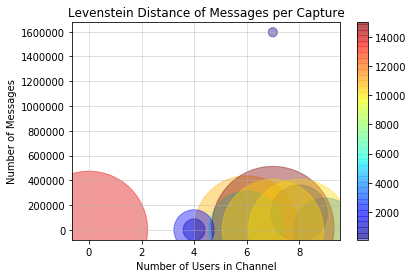

In [59]:
lev_dist_arr = []
num_messages_arr = []
num_sources_arr = []
for log_name,l in zip(log_names,logs_privmsg):
    for ll in l:
        channel, lev_dists_pairwise = ll
        lev_dist_arr.append(np.mean(lev_dists_pairwise))
        num_messages_arr.append(len(lev_dists_pairwise))
        num_sources_arr.append(np.random.randint(10))

ircprivmgs_visualize(lev_dist_arr, num_sources_arr, num_messages_arr)

## 